In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import torch

The data

The files station_locs.pt and weather_data.pt contain the location and temperature information in 339 weather stations in North America. The data was obtained from NOAA.
The complete package can be found in
https://github.com/meteostat/meteostat-python

We will use this data to analyze weather patterns and predictions. In the next cell we download and plot the data.

The data has 10 different columns:

'tavg' = Average  temp

'tmin' = Min  temp

'tmax' = Max  temp

'prcp' = Precipitation

'snow' = Snow

'wdir' = Wind direction

'wspd' = Wind Speed

'wpgt' = The dew point in °C  

'pres' = The average sea-level air pressure in hPa

'tsun' = The one hour sunshine total in minutes (m)



<ipython-input-34-a795c6053672>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Data = torch.load('weather_data.pt')
<ipython-input-34-a795c6053672>:2: FutureWarning: You a

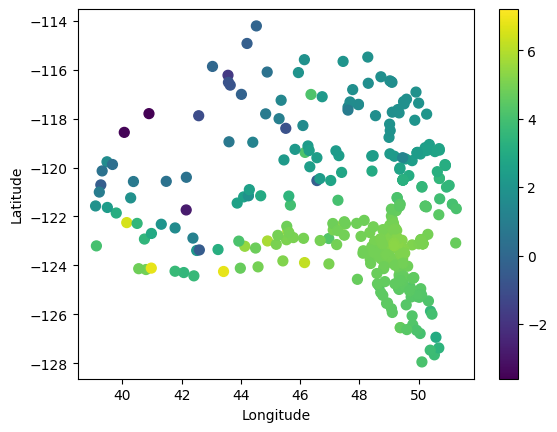

In [34]:
Data = torch.load('weather_data.pt')
station_locs = torch.load('station_locs.pt')

# Plot the ave temperature for the 0th date
map = Data[0,:,0]
plt.scatter(station_locs[:,0], station_locs[:,1], c=map, cmap='viridis',s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()


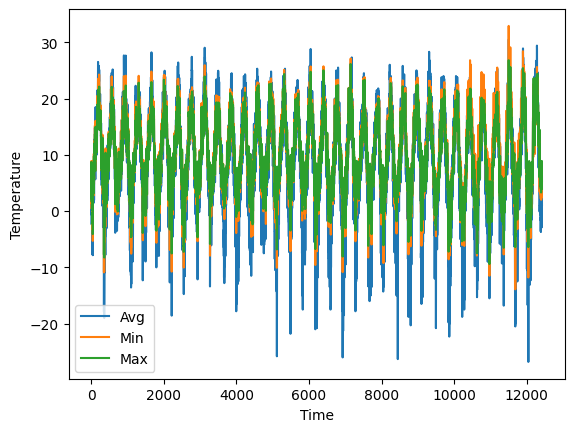

In [37]:
# plot the time series for the temperature at the first station
plt.plot(Data[:,0,0])
plt.plot(Data[:,1,0])
plt.plot(Data[:,2,0])

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(['Avg','Min','Max'])

**Questions 1-2**

1. Use the scatter plot similar to the one above to plot the pressure map in all stations

2. Plot a time series for the pressure at station 0 over time - The data has a clear problem. Can you identify a problem with the data?



In [43]:
# Your code here
pressure = Data[:,0,8]



We are going to solve the problem with the data by changing the data in the problematic locations.
First, we identify the spots in the vector that are problematic. We then replace them with an average of their neiboughrs

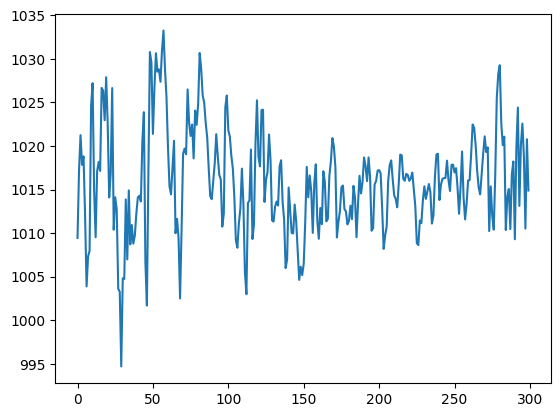

In [71]:
ind = torch.where(pressure==0)[0]
pressure[ind] = (pressure[ind+1] + pressure[ind-1])/2
plt.plot(pressure[:300])

**Question 3**

Reorganize the pressure as a matrix of 365 (days) and 34 years. Average over the days of the year and plot a graph of the average pressure over the years.
Is the pressure increasing/decreasing or inconclusive

In [49]:
# Your code here

**Linear Models for the Temp**

Let us extract a part of the temperature and see if we can model it


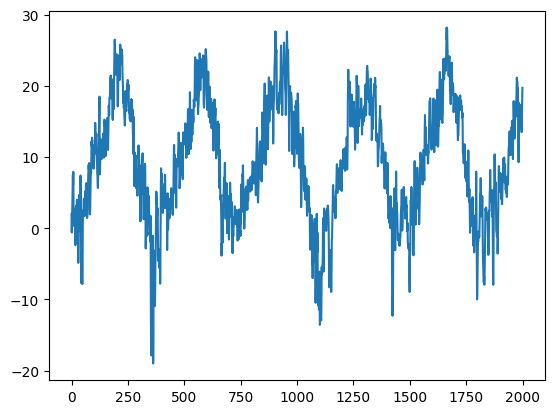

In [52]:
Temp = Data[:2000,0,0]
plt.plot(Temp)


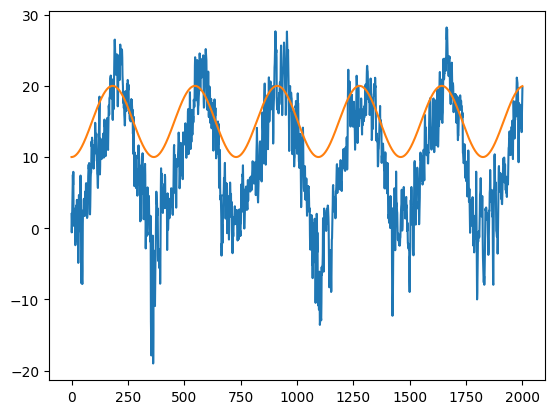

In [67]:
# We now want to approximate the data with the model
t = np.linspace(0,2000,2000)
L = 365
a = np.array([0,0,20.0,10.0])
Tapprox = a[0] + a[1]*t + a[2]*np.sin(t/L*np.pi)**2 + a[3]*np.cos(t/L*np.pi)**2
plt.plot(t,Temp)
plt.plot(t,Tapprox)



**Questions 4**

4. The model above is a linear model in the coefficients
a[0] to a[3]
Use the least squares formulation and find the optimal coefficients. Plot the resulting fit.

In [68]:
# Your code here

**Question 5-7**
5. We have a second model we want to use. It as the form
$$ T = a_0 + a_1t + a_2t^2 + a_3 |\sin(\pi/L t)| + a_ |\sin(2 \pi/L t)| + a_5 |\sin(3\pi/L t)| $$  

Setup a least square problem for the model and solve for the coefficients. Plot the solution.

6. Plot the data and the solution obtained by both models.

7. (Open discussion) Given the 2 models, which model you think is better? Why?
